# Reservoir Sampling 


## Problem 
Given a stream of elements too large to store in memory, pick a random element from the stream with uniform probability.

## Background 
A stream is a sequence of data elements made available one at a time. It can be thought of like items on a conveyer belt. Since the stream of elements is too large to store in memory, our program must be able to select a random element in O(1) space complexity, or in other words by analyzing the items on the conveyer belt only once as they come in.  
This is a type of algorithm know as reservoir sampling - randomly choosing k samples from a population of unknown size n in a single pass over the items. In this special case k = 1. 

## Approach
Consider a conveyer belt with an unknown number of items. A person stands next to the conveyer belt, and can select items from it one at a time. The last item he takes off the conveyer belt will be the one he keeps. The probability that he takes the $k^{th}$ item off the conveyer belt is 1/k.  
**Postulate**: each item on the conveyer belt has equal probability to be the item kept by the person. Therefore each item has 1/n chance of being kept, where n is the number of items on the conveyer belt.
### Mathematical Proof:
**Two Simple Truths**  
1. Last item has $\frac{1}{n}$ chance
2. For an item $\alpha$ positions from the end of the conveyer belt, the probility is $p(\alpha) = \frac{1}{n-\alpha} \times \frac{n-\alpha}{n-\alpha+1} \times \frac{n-\alpha+1}{n-\alpha+2} \ ... \times \frac{n-1}{n}$  
  
  
We need to prove that $p(\alpha) = \frac{1}{n}$ for all $\alpha$.  
  
**Proof by induction:**  
1. **Base Case**: $\alpha = 1$  
$p(1) = \frac{1}{n-1} \times \frac{n-1}{n} = \frac{1}{n}$  
    
2. **Inductive step:**  
Assume $p(\alpha)$ holds. Therefore we have:  
$p(\alpha + 1) = \frac{1}{n-\alpha-1} \times \frac{n-\alpha-1}{n-\alpha} \times \frac{n-\alpha}{n-\alpha+1} \times \frac{n-\alpha+1}{n-\alpha+2} \ ... \times \frac{n-1}{n}$    
$p(\alpha + 1) = \underbrace{\frac{1}{n-\alpha} \times \frac{n-\alpha}{n-\alpha+1} \times \frac{n-\alpha+1}{n-\alpha+2} \ ... \times \frac{n-1}{n}}_{p(\alpha)}$  
$p(\alpha + 1) = p(\alpha)$  
  
  
Therefore, $p(\alpha + 1)$ holds by the induction hypothesis. Since the base case $p(1)$ also holds, we have proved by induction that $p(\alpha) = \frac{1}{n}$ for all natural numbers $n$.  
  
Since $p(\alpha) = \frac{1}{n}$ covers all items before the last item, and the last item trivially has probability $\frac{1}{n}$, we have proven that all items on the conveyer belt have equal chance ($\frac{1}{n}$) of being kept.

## The Code

In [1]:
import random

count = 0
chosen_element = None

def select_element(x):
    global count
    global chosen_element
    count += 1
    if random.random() <= 1/count:
        chosen_element = x

## Testing

<BarContainer object of 8 artists>

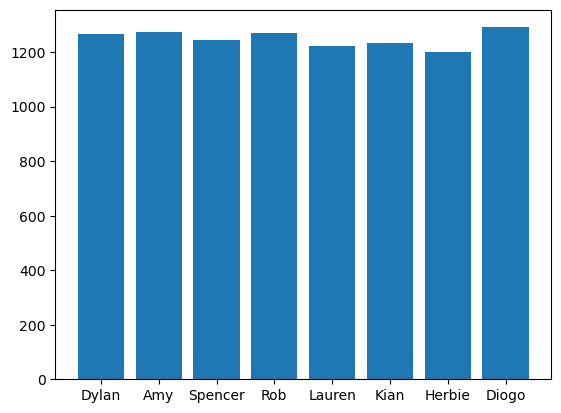

In [2]:
import matplotlib.pyplot as plt

test_stream = ['Dylan','Amy','Spencer','Rob','Lauren','Kian','Herbie','Diogo']
answers = []
occurrences = []

#Testing function on data stream 10000 times
for test in range(10000):
    for element in test_stream:
        select_element(element) 
    answers.append(chosen_element)
    chosen_element = 0 
    count = 0 

#Plotting results
for name in test_stream:
    occurrences.append(answers.count(name))

plt.bar(test_stream,occurrences)    
